In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
data = pd.read_csv('/content/IRIS.csv')

In [6]:
print("Dataset Preview")

Dataset Preview


In [7]:
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [9]:
data.drop

<bound method DataFrame.drop of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [11]:
x=data.drop('species',axis=1)
y=data['species']
label = LabelEncoder()
y = label.fit_transform(y)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


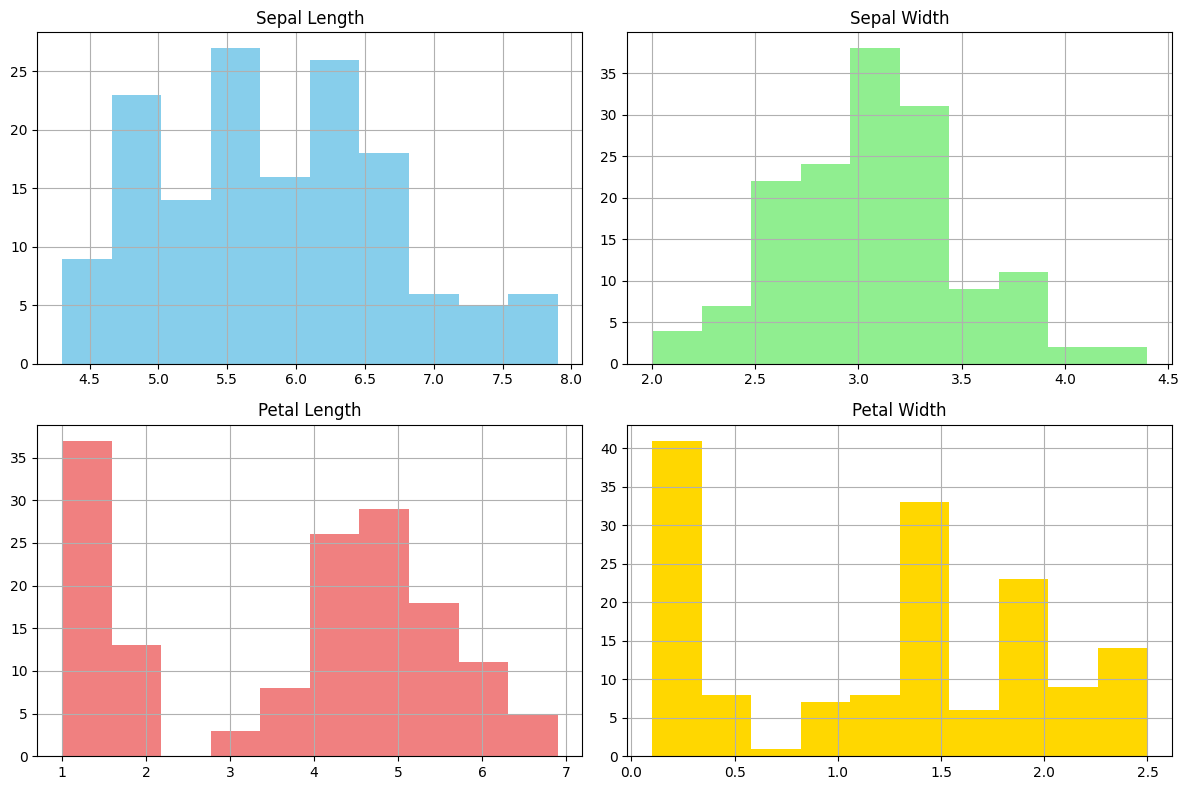

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
data['sepal_length'].hist(ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Sepal Length')

data['sepal_width'].hist(ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Sepal Width')

data['petal_length'].hist(ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Petal Length')

data['petal_width'].hist(ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Petal Width')

plt.tight_layout()
plt.show()

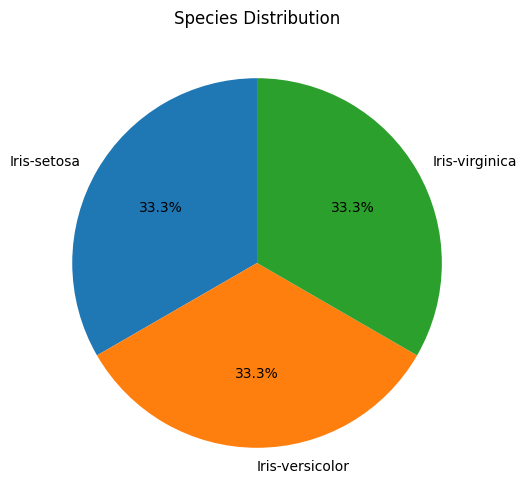

In [18]:
#distribution of species
species_counts = data['species'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Species Distribution')
plt.show()

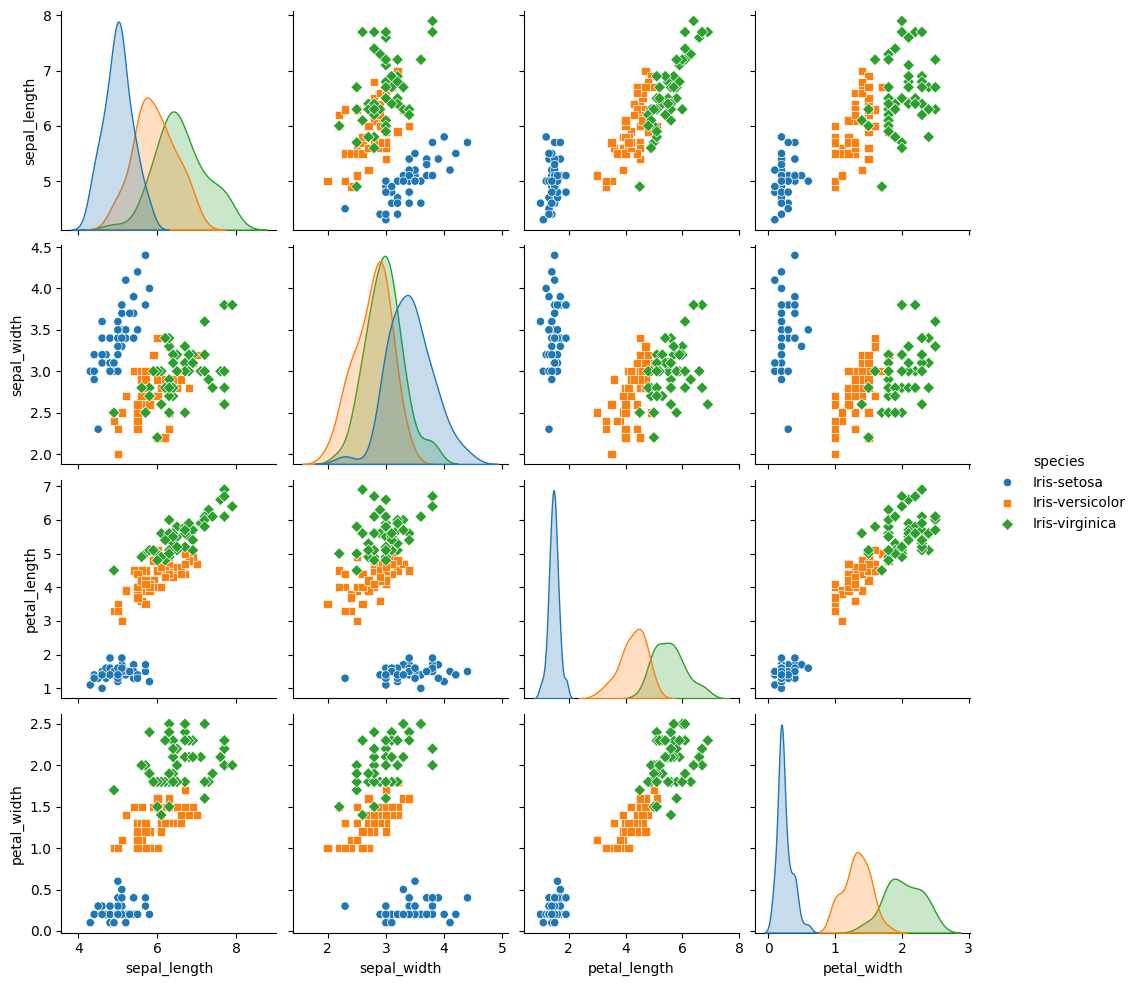

In [20]:
import seaborn as sns
sns.pairplot(data, hue='species', markers=["o", "s", "D"], height=2.5)
plt.show()

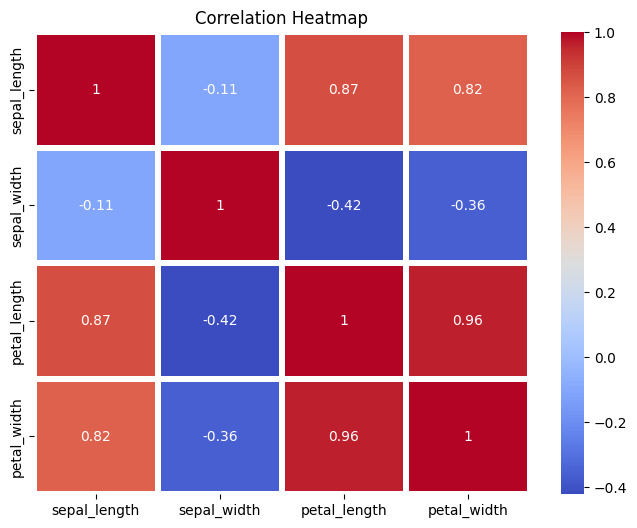

In [23]:
plt.figure(figsize=(8, 6))
numerical_data = data.select_dtypes(include=['number'])  # Select only numerical columns
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=3)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=40)

In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [27]:
model=LogisticRegression(max_iter=300)
model.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [28]:
y_pred=model.predict(X_test)

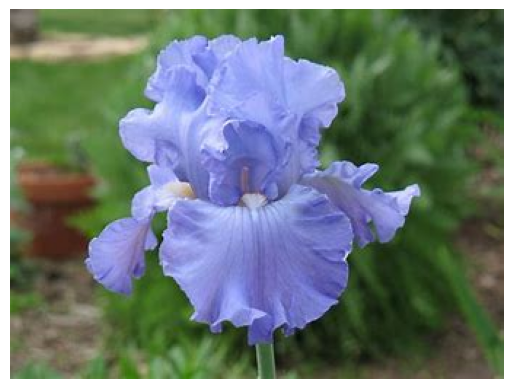

In [40]:
img_path='/content/OIP.jpg'
img=mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [31]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {(accuracy*100):.2f}%")

Model Accuracy: 97.14%


In [38]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.97      0.95        32
           2       0.97      0.95      0.96        38

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [39]:
print(confusion_matrix(y_test,y_pred))

[[35  0  0]
 [ 0 31  1]
 [ 0  2 36]]
